**Libraries Import**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/data.csv',encoding='unicode_escape')

**Data Cleaning and Analysis**

In [ ]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
data.shape

(435742, 13)

In [ ]:
data.isnull()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,False,False,False,False,True,False,False,False,True,True,True,True,False
1,False,False,False,False,True,False,False,False,True,True,True,True,False
2,False,False,False,False,True,False,False,False,True,True,True,True,False
3,False,False,False,False,True,False,False,False,True,True,True,True,False
4,False,False,False,False,True,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,False,False,False,False,False,False,False,False,False,True,False,True,False
435738,False,False,False,False,False,False,False,False,False,True,False,True,False
435739,True,True,False,True,True,True,True,True,True,True,True,True,True
435740,True,True,False,True,True,True,True,True,True,True,True,True,True


In [ ]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [ ]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
data.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [ ]:
null=data.isnull().sum().sort_values(ascending=False)

In [ ]:
null

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [ ]:
null_percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [ ]:
null_percent

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [ ]:
null_data_with_percent = pd.concat([null, null_percent], axis=1, keys=['Total','Percent'])

In [ ]:
null_data_with_percent

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


Unnecessary Columns

In [ ]:
data.drop(['agency'],axis=1,inplace=True)
data.drop(['stn_code'],axis=1,inplace=True)
data.drop(['date'],axis=1,inplace=True)
data.drop(['sampling_date'],axis=1,inplace=True)
data.drop(['location_monitoring_station'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [ ]:
data['location']=data['location'].fillna(data['location'].mode()[0])
data['type']=data['type'].fillna(data['type'].mode()[0])
data.fillna(0, inplace=True)

In [ ]:
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [ ]:
data

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


In [ ]:
data['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

In [ ]:
data['type'].value_counts()

Residential, Rural and other Areas    184407
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

**Data Visualization**

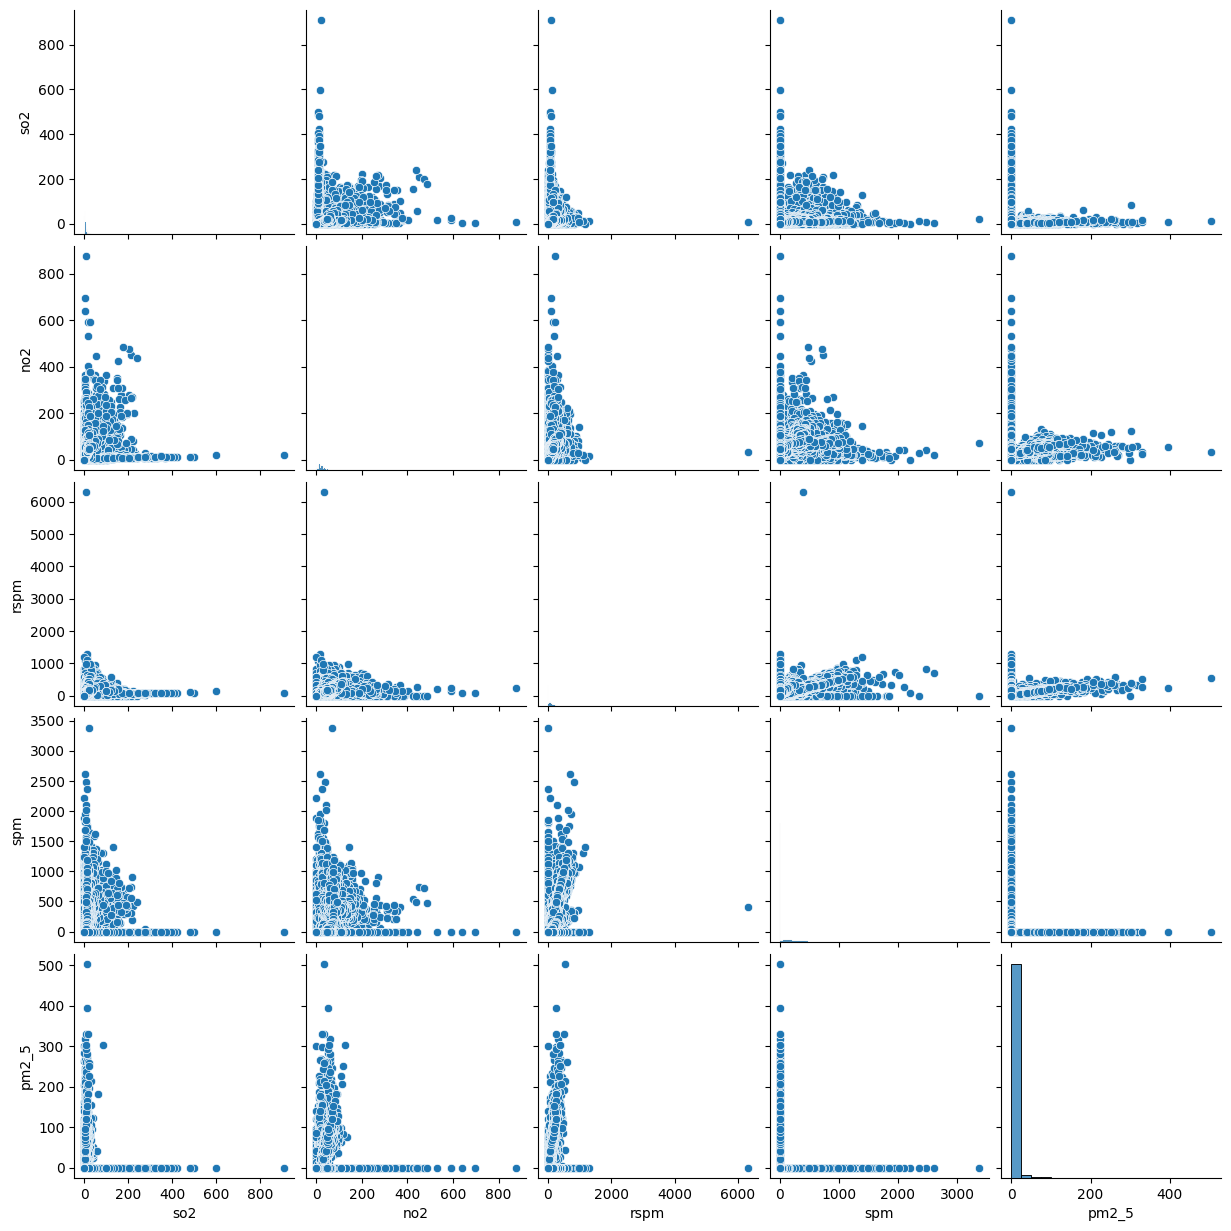

In [ ]:
sns.pairplot(data=data)

[]

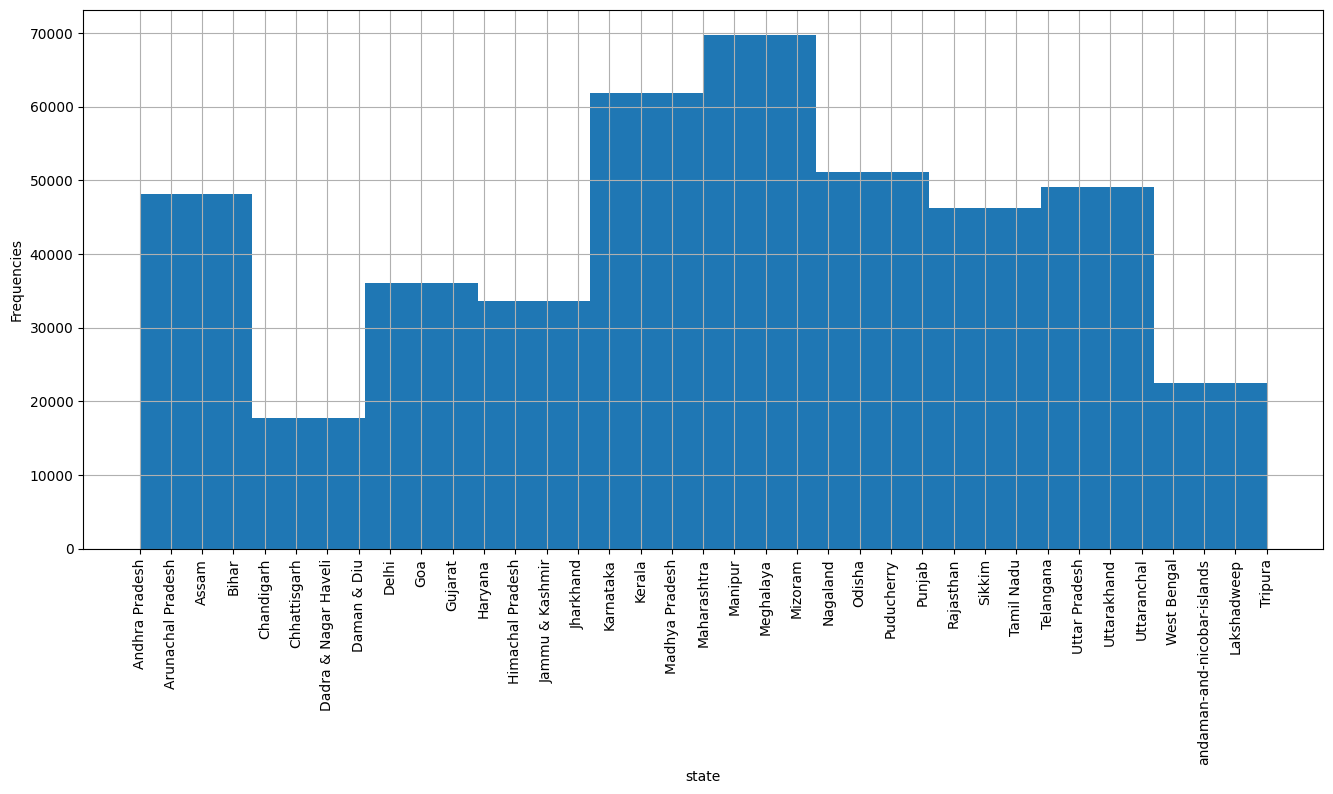

In [ ]:
plt.figure(figsize=(16, 7))
plt.xticks(rotation=90)
data.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

[]

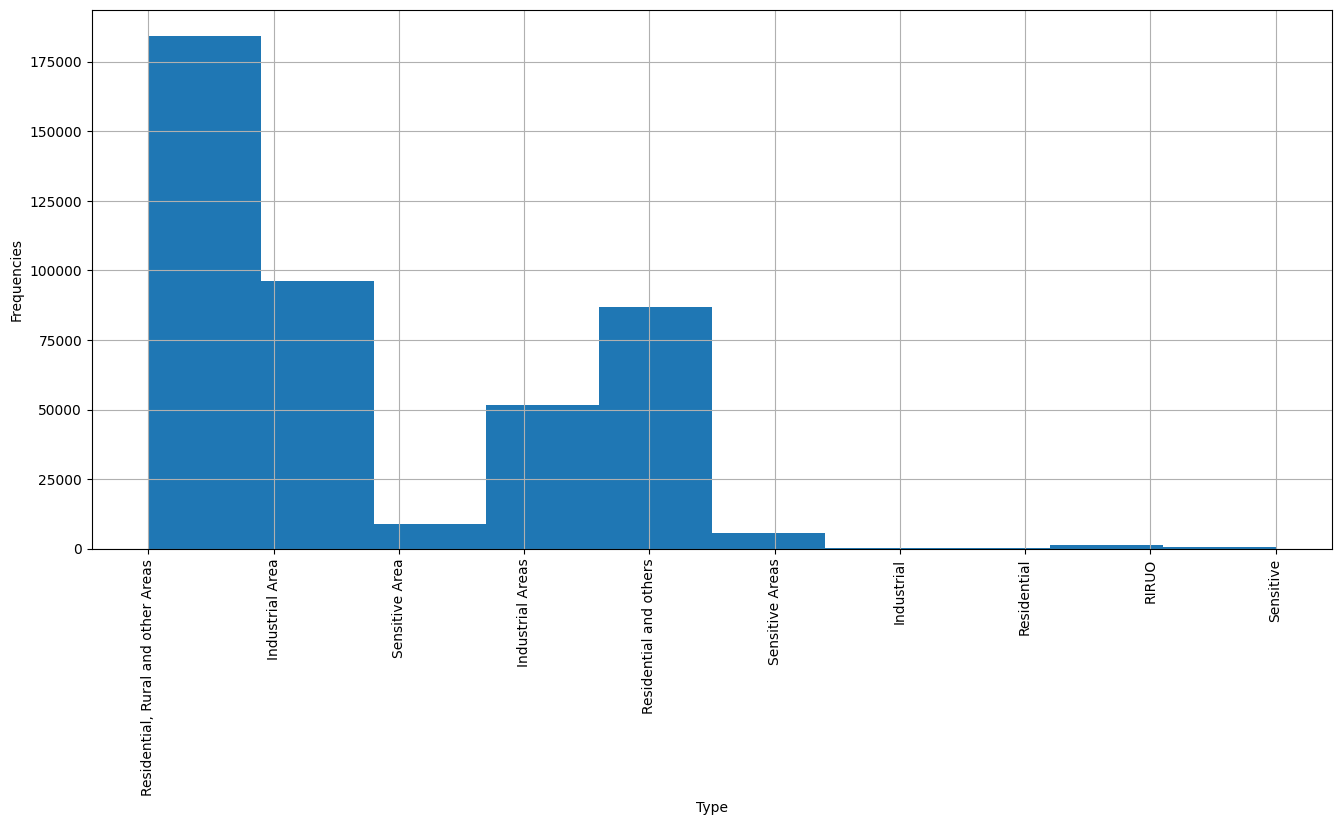

In [ ]:
plt.figure(figsize=(16, 7))
plt.xticks(rotation=90)
data.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

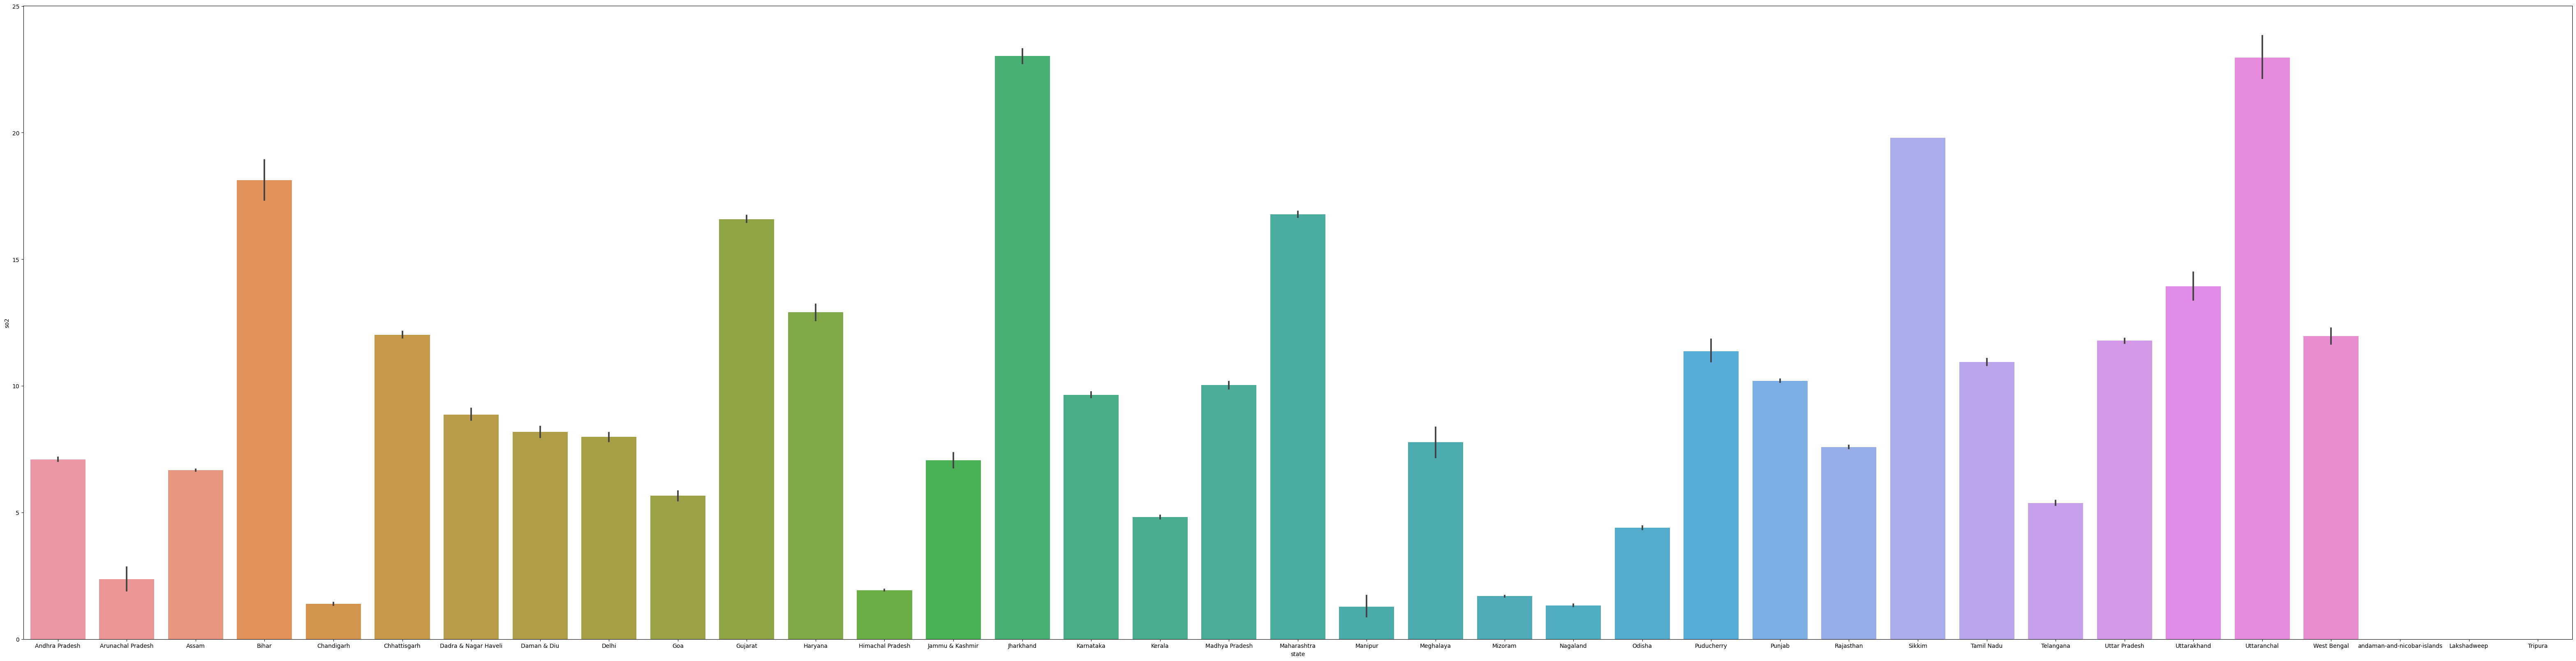

In [ ]:
plt.figure(figsize=(80, 20))
sns.barplot(x='state',y='so2',data=data);

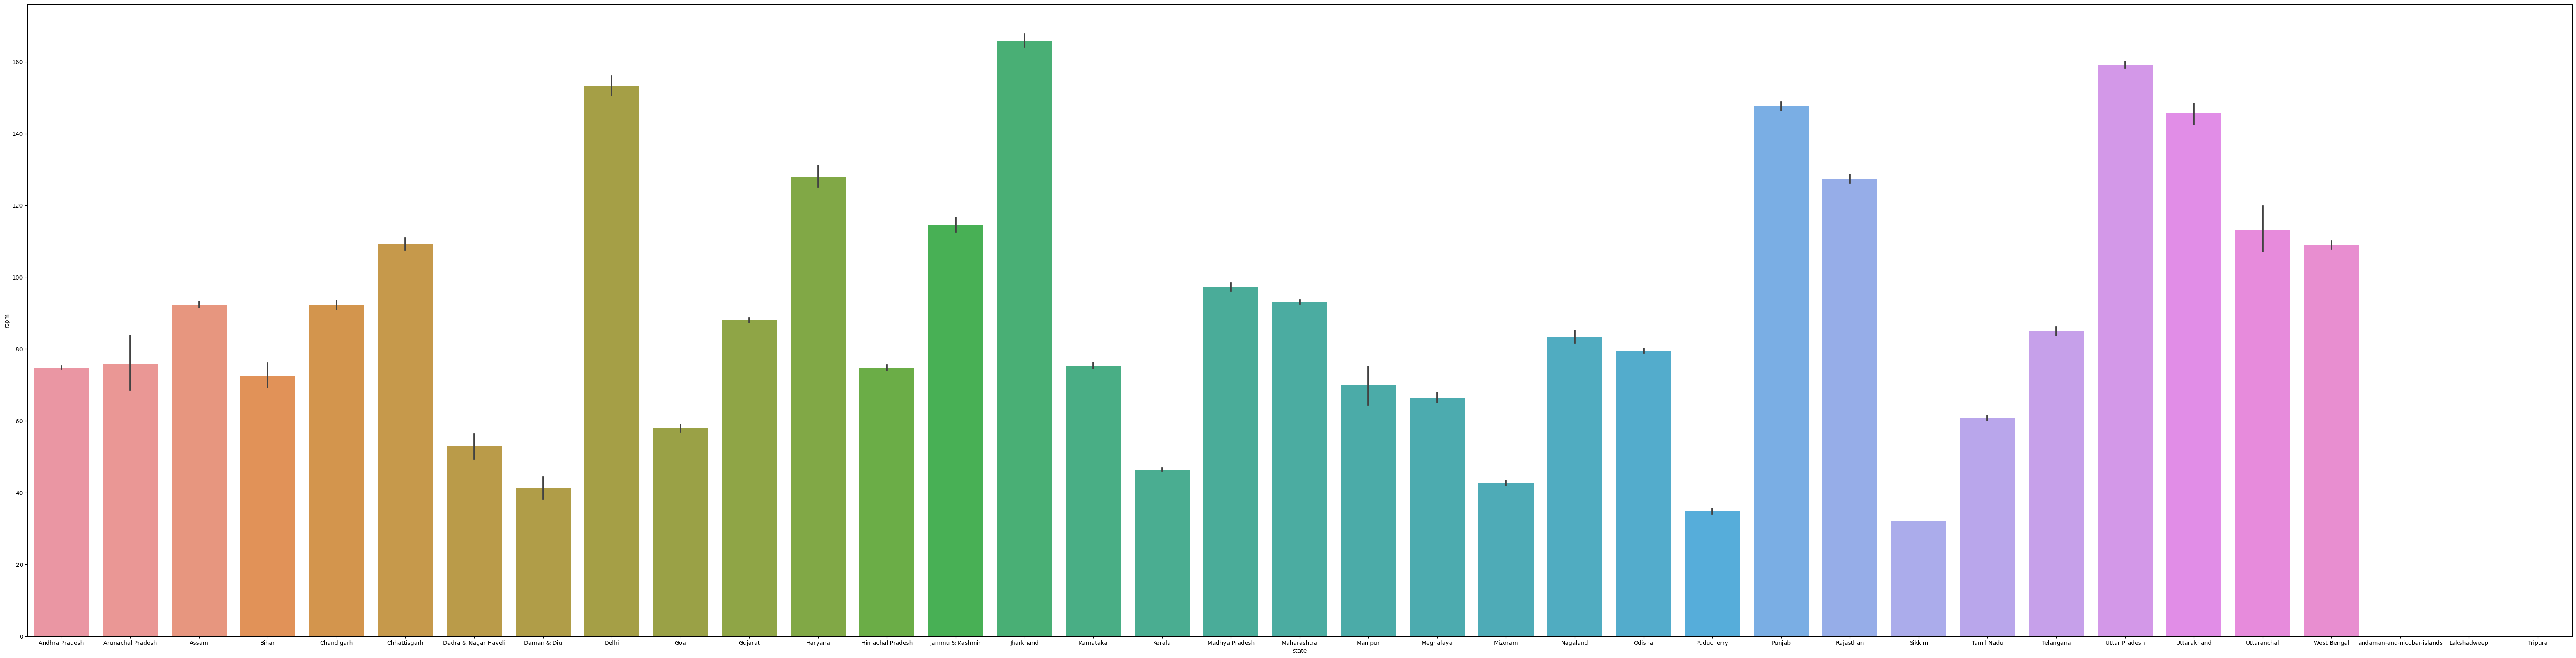

In [ ]:
plt.figure(figsize=(80, 20))
sns.barplot(x='state',y='rspm',data=data);

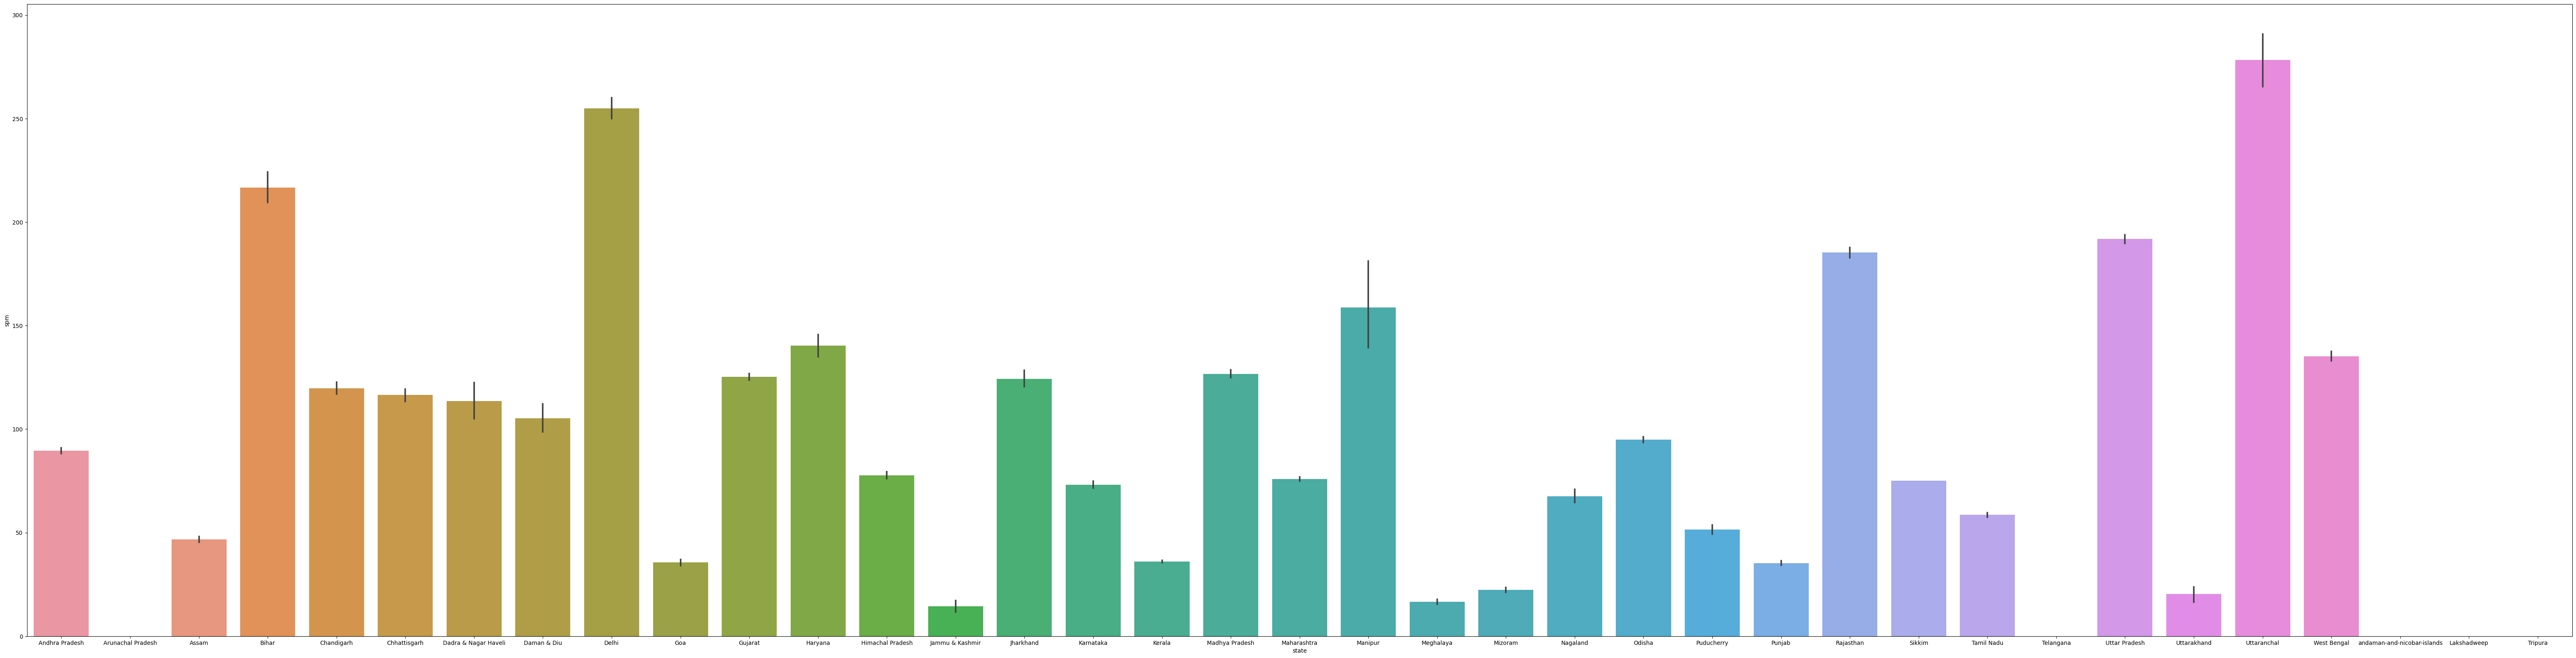

In [ ]:
plt.figure(figsize=(80, 20))
sns.barplot(x='state',y='spm',data=data);

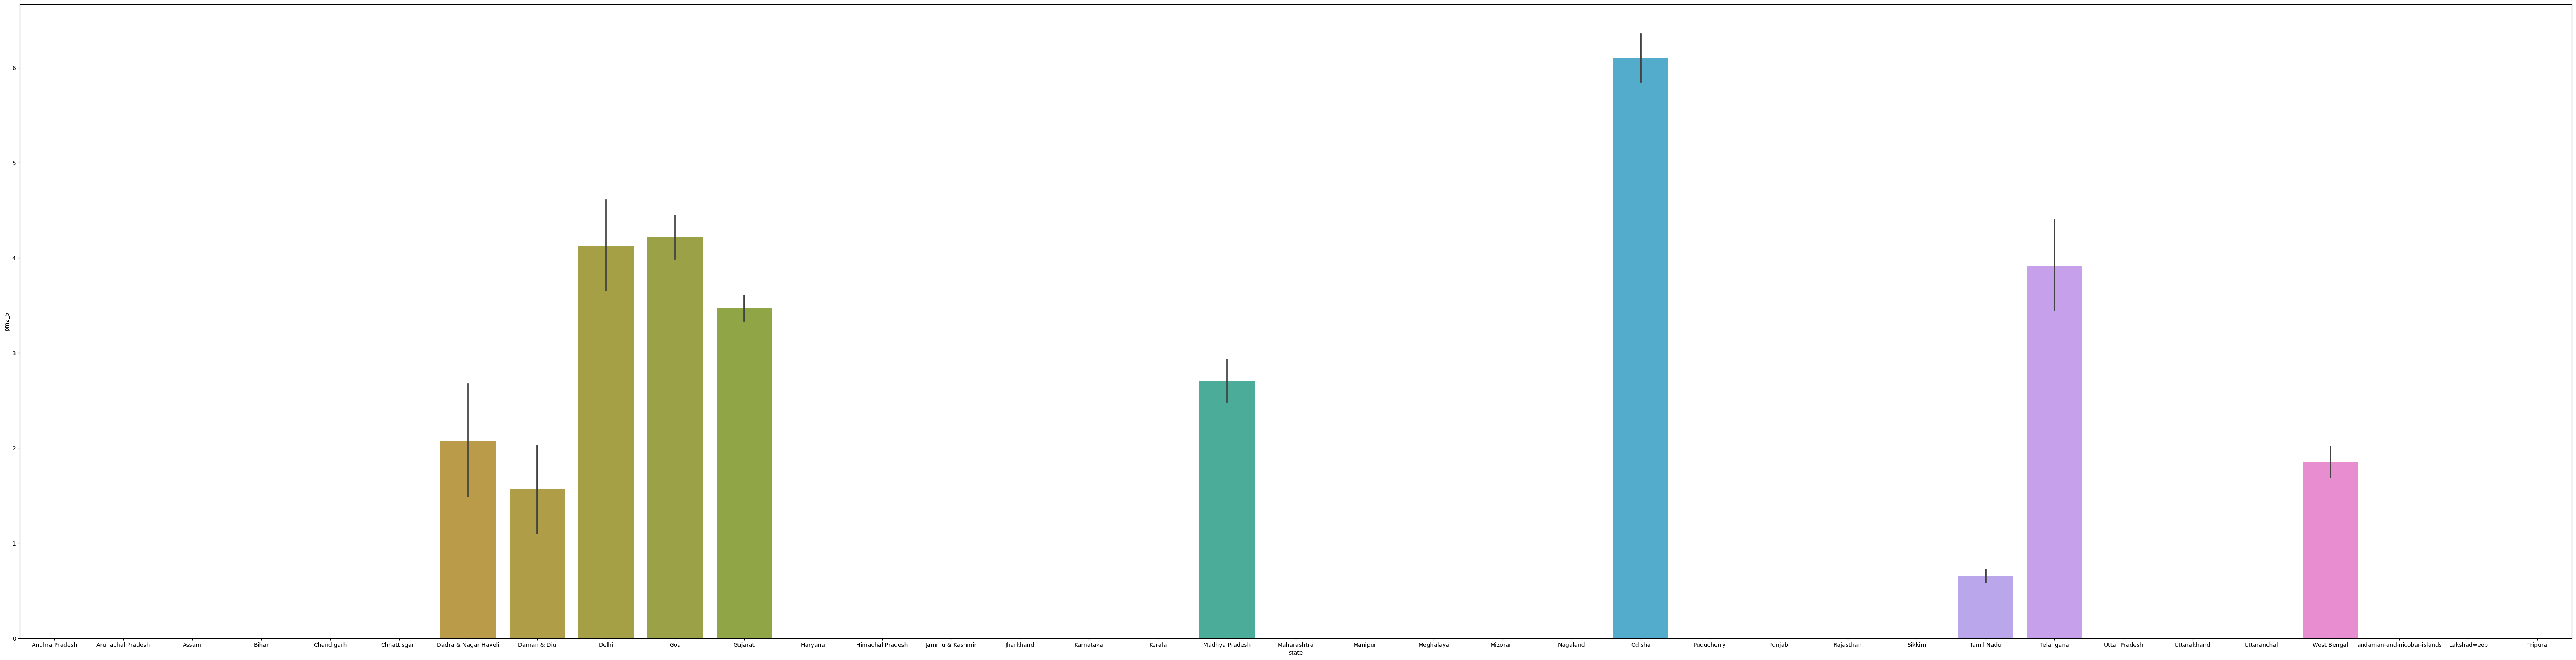

In [ ]:
plt.figure(figsize=(80, 20))
sns.barplot(x='state',y='pm2_5',data=data);

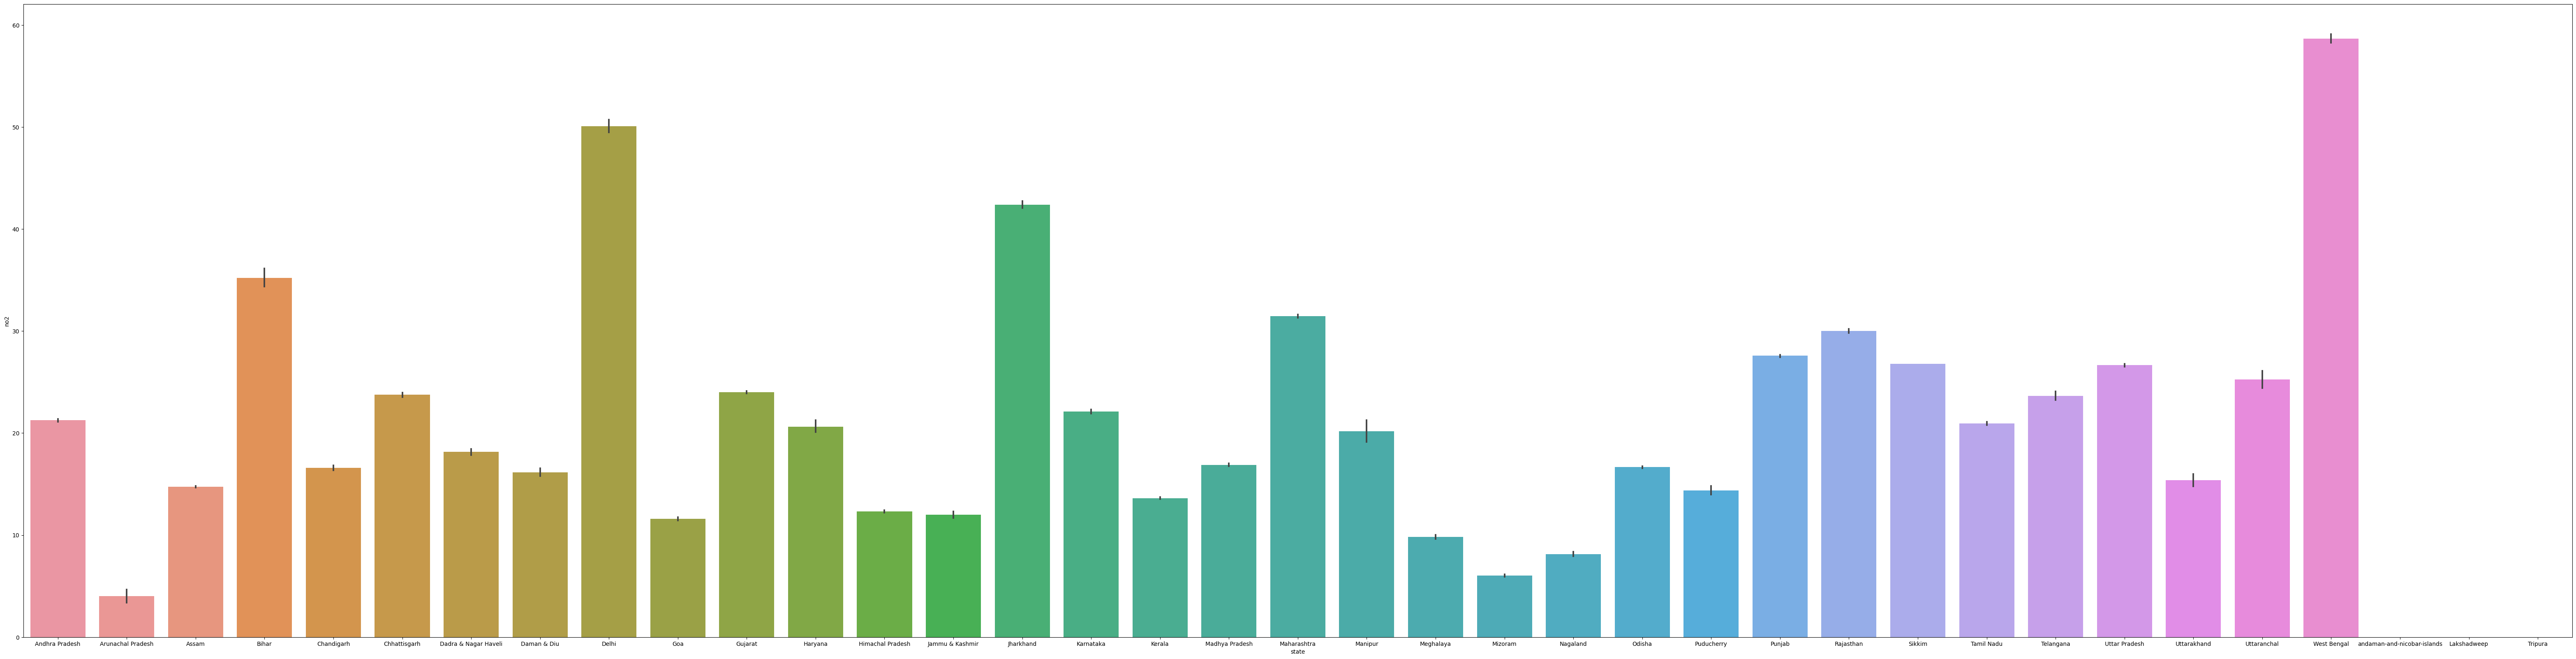

In [ ]:
plt.figure(figsize=(80, 20))
sns.barplot(x='state',y='no2',data=data);

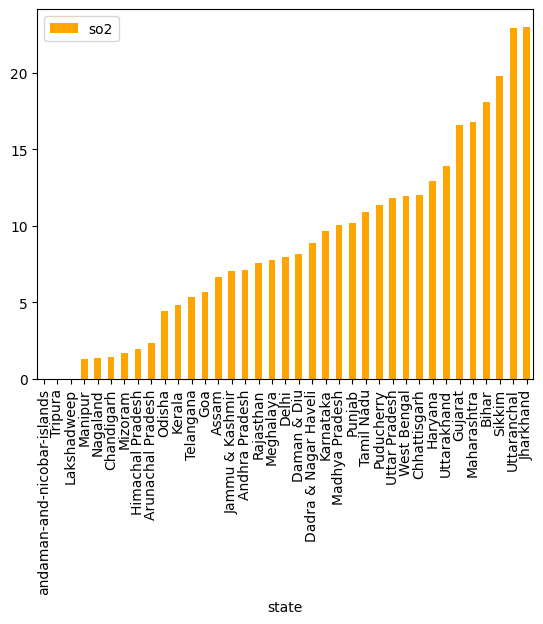

In [ ]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='orange')
plt.show()

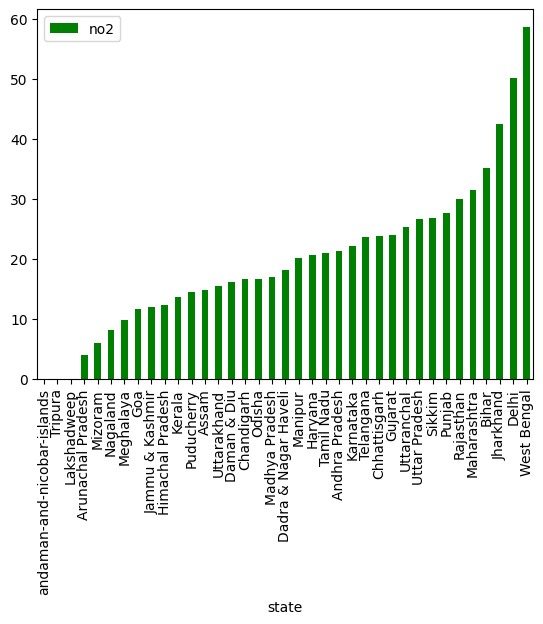

In [ ]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='green')
plt.show()

**Air Quality Index Calculation**

In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [ ]:
def cal_NOi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['NOi']=data['no2'].apply(cal_NOi)
df=data[['no2','NOi']]
df.head()

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [ ]:
def cal_RSPMI(rspm):
  rpi=0
  if(rpi<=30):
    rpi=rpi*50/30
  elif(rpi>30 and rpi<=60):
    rpi=50+(rpi-30)*50/30
  elif(rpi>60 and rpi<=90):
    rpi=100+(rpi-60)*100/30
  elif(rpi>90 and rpi<=120):
    rpi=200+(rpi-90)*100/30
  elif(rpi>120 and rpi<=250):
    rpi=300+(rpi-120)*(100/130)
  else:
    rpi=400+(rpi-250)*(100/130)
  return rpi
data['Rpi']=data['rspm'].apply(cal_RSPMI)
df= data[['rspm','Rpi']]
df.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi
data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['NOi'],x['Rpi'],x['SPMi']),axis=1)
df= data[['state','SOi','NOi','Rpi','SPMi','AQI']]
df.head()

,state,SOi,NOi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [ ]:
def AQIrange(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"
data['AQIrange'] = data['AQI'].apply(AQIrange)
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,NOi,Rpi,SPMi,AQI,AQIrange
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [ ]:
data['AQIrange'].value_counts()

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQIrange, dtype: int64

In [ ]:
X=data[['SOi','NOi','Rpi','SPMi']]
Y=data['AQI']

In [ ]:
X.head()

,SOi,NOi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [ ]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

**Dependent and Independent Columns**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


**Linear Regression**

In [ ]:
LR=LinearRegression()
LR.fit(X_train,Y_train)
train_pred=LR.predict(X_train)
test_pred=LR.predict(X_test)

In [ ]:
train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("Training Data = ",str(train))
print("Test Data = ",str(test))
print('RSquared train = ',LR.score(X_train, Y_train))
print('RSquared test = ',LR.score(X_test, Y_test))

Training Data =  13.583424938613533
Test Data =  13.672937344789002
RSquared train =  0.9849533579250526
RSquared test =  0.9847286394495923


**Decision Tree Regressor**

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [ ]:
train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("Training Data = ",str(train))
print("Test Data = ",str(test))
print('RSquared train = ',DT.score(X_train, Y_train))
print('RSquared test = ',DT.score(X_test, Y_test))

Training Data =  2.2229525650430966e-13
Test Data =  1.2981180064739768
RSquared train =  1.0
RSquared test =  0.9998623480298214


**Random Forest Regressor**

In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)
train_preds=RF.predict(X_train)
test_preds=RF.predict(X_test)

In [ ]:
train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("Training Data = ",str(train))
print("Test Data = ",str(test))
print('RSquared train = ',RF.score(X_train, Y_train))
print('RSquared test = ',RF.score(X_test, Y_test))

Training Data =  0.4304601648808581
Test Data =  1.1722256443615848
RSquared train =  0.999984889217615
RSquared test =  0.999887752540722


**Classification**

In [ ]:
X2=data[['SOi','NOi','Rpi','SPMi']]
Y2=data['AQIrange']

In [ ]:
X_trains,X_tests,Y_trains,Y_tests=train_test_split(X2,Y2,test_size=0.33,random_state=70)

**Logistic Regression**

In [ ]:
logistic_reg=LogisticRegression().fit(X_trains,Y_trains)
train_prediction=logistic_reg.predict(X_trains)
print("Accuracy train= ",accuracy_score(Y_trains,train_prediction))
test_prediction=logistic_reg.predict(X_tests)
print("Accuracy test= ",accuracy_score(Y_tests,test_prediction))
print("KappaScore= ",metrics.cohen_kappa_score(Y_tests,test_prediction))

Accuracy train=  0.7276012426913104
Accuracy test=  0.7271254216071491
KappaScore=  0.584377382981496


In [ ]:
logistic_reg.predict([[4.1,13.3,22,51]])

array(['Poor'], dtype=object)

In [ ]:
logistic_reg.predict([[16.4,6.3,51,107]])

array(['Unhealthy'], dtype=object)

In [ ]:
logistic_reg.predict([[654,321,73,107]])

array(['Moderate'], dtype=object)

In [ ]:
logistic_reg.predict([[734,327,71,100]])

array(['Good'], dtype=object)

**Decision Tree Classifier**

In [ ]:
decision_tree=DecisionTreeClassifier().fit(X_trains,Y_trains)
train_prediction2=decision_tree.predict(X_trains)
print("Accuracy train= ",accuracy_score(Y_trains,train_prediction2))
test_prediction2=decision_tree.predict(X_tests)
print("Accuracy test= ",accuracy_score(Y_tests,test_prediction2))
print("KappaScore= ",metrics.cohen_kappa_score(Y_tests,test_prediction2))

Accuracy train=  1.0
Accuracy test=  0.7271254216071491
KappaScore=  0.9997111966529943


In [ ]:
decision_tree.predict([[24,32,21,45]])

array(['Good'], dtype=object)

In [ ]:
decision_tree.predict([[654,321,73,107]])

array(['Very unhealthy'], dtype=object)

In [ ]:
decision_tree.predict([[4.1,13.3,22,51]])

array(['Moderate'], dtype=object)

In [ ]:
decision_tree.predict([[734,327,71,100]])

array(['Unhealthy'], dtype=object)

**Random Forest Classifier**

In [ ]:
random_forest=RandomForestClassifier().fit(X_trains,Y_trains)
train_prediction3=random_forest.predict(X_trains)
print("Accuracy train= ",accuracy_score(Y_trains,train_prediction3))
test_prediction3=random_forest.predict(X_tests)
print("Accuracy test= ",accuracy_score(Y_tests,test_prediction3))
print("KappaScore= ",metrics.cohen_kappa_score(Y_tests,test_prediction3))

Accuracy train=  1.0
Accuracy test=  0.9998191870371014
KappaScore=  0.9997318272798166


In [ ]:
random_forest.predict([[24,32,21,45]])

array(['Good'], dtype=object)

In [ ]:
random_forest.predict([[654,321,73,107]])

array(['Unhealthy'], dtype=object)

In [ ]:
random_forest.predict([[4.1,13.3,22,51]])

array(['Moderate'], dtype=object)

In [ ]:
random_forest.predict([[734,327,71,100]])

array(['Unhealthy'], dtype=object)

**K-Nearest Neighbours**

In [ ]:
KNN=KNeighborsClassifier().fit(X_trains,Y_trains)
train_prediction4=KNN.predict(X_trains)
print("Accuracy train= ",accuracy_score(Y_trains,train_prediction4))
test_prediction4=KNN.predict(X_tests)
print("Accuracy test= ",accuracy_score(Y_tests,test_prediction4))
print("KappaScore= ",metrics.cohen_kappa_score(Y_tests,test_prediction4))

Accuracy train=  0.9981640503242026
Accuracy test=  0.9967105949441913
KappaScore=  0.9951204869122668


In [ ]:
KNN.predict([[6,17.8,100,156]])

array(['Poor'], dtype=object)